# Machine Learning project: build a lending model 
The task is to build a machine learning model to predict wether borrowers are likely to pay or default on their loan. Two main questions to address in the lending industy:

1) How risky is the borrower?

2) Given the borrower's risk, should we lend him/her?

I will refer on https://www.dataquest.io/blog/machine-learning-preparing-data/ example and expand it with my own knowledge. In this notebook, i will focus on cleaning the data.

# Step 1: data pre-processing
In this part, I show how to clean and remove unnecessary features. I will show how to identify *constant features*, *duplicate feature*, *duplicate rows*, and *features with a high number of missing values*

## 1. Import the Data


In [224]:
import pandas as pd
import missingno as msno 
import numpy as np
pd.set_option('max_columns', 120)
pd.set_option('max_colwidth', 5000)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

#### Load the data


In [225]:
loans_2007 = pd.read_csv('C:/Users/adjanni/Desktop/Python_DataScience_Training/Data_Cleaning_examples/data/lending_club_loans.csv', skiprows=1, low_memory=False)
shape_raw = loans_2007.shape

### 1.1 Drop features missing more than 50% data

First, calculate the percentange of missing values for each feature.

In [226]:
missing_perc = loans_2007.isnull().mean().sort_values(ascending=False)

Top 10 features missing the most data

In [227]:
missing_perc.head(10)

total_il_high_credit_limit    1.0
mo_sin_old_rev_tl_op          1.0
bc_util                       1.0
bc_open_to_buy                1.0
avg_cur_bal                   1.0
acc_open_past_24mths          1.0
inq_last_12m                  1.0
total_cu_tl                   1.0
inq_fi                        1.0
total_rev_hi_lim              1.0
dtype: float64

Let's visualise the distribution of missing data percentage

Text(0.5, 0, 'Fraction of Data missing')

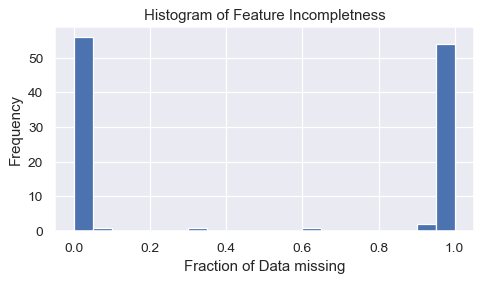

In [228]:
plt.figure(figsize=(6,3), dpi=90)
missing_perc.plot.hist(bins=20)
plt.title('Histogram of Feature Incompletness')
plt.xlabel('Fraction of Data missing')


From the above plot, there is a large gap between features missing less than 10% and these missing 100% data. It is generally difficult to accurately model data with more than 50% missing values, we drop such data. 

1. Extract and store these missing more 50% of data in an alphabetic list
2. Remove them from the list

In [229]:
# Drop any columns with 50% of missing values
half_count = 1/2
drop_list = sorted(list(missing_perc[missing_perc > half_count].index))

print(drop_list)

##
print('The number of features droped are ', len(drop_list))

['acc_open_past_24mths', 'all_util', 'annual_inc_joint', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'dti_joint', 'il_util', 'inq_fi', 'inq_last_12m', 'max_bal_bc', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_last_delinq', 'mths_since_last_major_derog', 'mths_since_last_record', 'mths_since_rcnt_il', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'next_pymnt_d', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc_6m', 'open_il_12m', 'open_il_24m', 'open_il_6m', 'open_rv_12m', 'open_rv_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_coll_amt', 'tot_cur_bal', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bal_il', 'total_bc_limit', 'total_cu_tl', 'to

Drop these features

In [230]:
loans_2007.drop(drop_list, axis=1, inplace=True)

In [231]:
print("The shape at the begining was ", shape_raw, "The shape after drop > 50% missing data", loans_2007.shape)

The shape at the begining was  (42538, 115) The shape after drop > 50% missing data (42538, 58)


We see that there are approximately 42600 rows and each has 58 features including the target variable

### 1.2 Importing the data dictionary

In [232]:
# The LCDDataDictionary provides us with an explanation of each row
data_dictionary = pd.read_csv('C:/Users/adjanni/Desktop/Python_DataScience_Training/Data_Cleaning_examples/data/LCDataDictionary.csv')
print(data_dictionary.shape[0])
print(data_dictionary.columns.tolist())
data_dictionary.head()

117
['LoanStatNew', 'Description']


,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [233]:
# Rename the columns 
data_dictionary = data_dictionary.rename(columns={"LoanStatNew" : "name", "Description" : "description"})

###### Join the first row of loans 2007 to data dictionary
1. name — contains the column names of loans_2007
2. dtypes — contains the data types of the loans_2007 columns
3. first value — contains the values of loans_2007 first row
4. description — explains what each column in loans_2007 represents

In [234]:
loans_2007_dtypes = pd.DataFrame(loans_2007.dtypes, columns=['dtypes'])

loans_2007_dtypes = loans_2007_dtypes.reset_index()

loans_2007_dtypes['name'] = loans_2007_dtypes['index']

loans_2007_dtypes = loans_2007_dtypes[['name','dtypes']]

loans_2007_dtypes['first value'] = loans_2007.loc[0].values

#print(ch1, ch2, ch3, ch4, ch5)
#print(loans_2007_dtypes.head(3)) 
print(loans_2007_dtypes.head(3)) 
data_dictionary.head(3)


        name   dtypes first value
0         id   object     1077501
1  member_id  float64  1.2966e+06
2  loan_amnt  float64        5000


,name,description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application


### 1.3 Merging the dictionary with the data

The function merge() is used here.

In [235]:
preview = loans_2007_dtypes.merge(data_dictionary, on='name', how= 'left')
print(list(preview.columns))
preview.head(5)

['name', 'dtypes', 'first value', 'description']


,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.


OK! Each feature in the data is associated with a description from the dictionary. An indepth investigation is carried to check the features that are essential to model the loan prediction. 

## 2. Data Pre-processing and Exploratory Analysis

In this section, we will inspect each feature individually:

    1. Remove unnecessary rows
    2. View summary statistics and visualise the data
    3. Modify the feature to make it useful for modeling.

Let's focus on clusters of borrowers instead of individuals and analyse the features by block of 19 features.

In [236]:
preview[0:18]

,name,dtypes,first value,description
0,id,object,1077501,A unique LC assigned ID for the loan listing.
1,member_id,float64,1.2966e+06,A unique LC assigned Id for the borrower member.
2,loan_amnt,float64,5000,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
3,funded_amnt,float64,5000,The total amount committed to that loan at that point in time.
4,funded_amnt_inv,float64,4975,The total amount committed by investors for that loan at that point in time.
5,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
6,int_rate,object,10.65%,Interest Rate on the loan
7,installment,float64,162.87,The monthly payment owed by the borrower if the loan originates.
8,grade,object,B,LC assigned loan grade
9,sub_grade,object,B2,LC assigned loan subgrade


In [237]:
# What may be useful for our model, is to focus on clusters of borrowers instead of individuals. So we will drop these features:
drop_list = ['id', 'member_id',  'funded_amnt', 'funded_amnt_inv', 'int_rate', 'sub_grade', 'emp_title', 'issue_d']
loans_2007 = loans_2007.drop(drop_list, axis=1)
#list(loans_2007.columns)

In [238]:
# Second group columns
preview[19:38]

,name,dtypes,first value,description
19,desc,object,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,Loan description provided by the borrower
20,purpose,object,credit_card,A category provided by the borrower for the loan request.
21,title,object,Computer,The loan title provided by the borrower
22,zip_code,object,860xx,The first 3 numbers of the zip code provided by the borrower in the loan application.
23,addr_state,object,AZ,The state provided by the borrower in the loan application
24,dti,float64,27.65,"A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income."
25,delinq_2yrs,float64,0,The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years
26,earliest_cr_line,object,Jan-1985,The month the borrower's earliest reported credit line was opened
27,fico_range_low,float64,735,The lower boundary range the borrower’s FICO at loan origination belongs to.
28,fico_range_high,float64,739,The upper boundary range the borrower’s FICO at loan origination belongs to.


## Observations


After analysing carefully this range, we understand that the features we need for our model are *fico_range_low*, *fico_range_high*
, *last_fico_range_low*, and *last_fico_range_high* columns. 

According to wikipedia, The FICO model is used by the vast majority of banks and credit grantors, and is based on consumer credit files of the three national credit bureaus: Experian, Equifax, and TransUnion. Because a consumer's credit file may contain different information at each of the bureaus, FICO scores can vary depending on which bureau provides the information to FICO to generate the score. 

The question is: which one the FICO score can help to predict accurate information about the borrower?
The *last_fico_range_low* and *last_fico_range_high* represent the update to the borrowers score. So we will use *fico_range_low*, *fico_range_high* to help to build  the model.


In [239]:
# We will drop all the other features
drop_cols = ['zip_code','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
print(list(loans_2007.columns))

['loan_amnt', 'term', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


In [240]:
# Let us look at the last block
preview[38:]

,name,dtypes,first value,description
38,total_pymnt,float64,5863.16,Payments received to date for total amount funded
39,total_pymnt_inv,float64,5833.84,Payments received to date for portion of total amount funded by investors
40,total_rec_prncp,float64,5000,Principal received to date
41,total_rec_int,float64,863.16,Interest received to date
42,total_rec_late_fee,float64,0,Late fees received to date
43,recoveries,float64,0,post charge off gross recovery
44,collection_recovery_fee,float64,0,post charge off collection fee
45,last_pymnt_d,object,Jan-2015,Last month payment was received
46,last_pymnt_amnt,float64,171.62,Last total payment amount received
47,last_credit_pull_d,object,Sep-2016,The most recent month LC pulled credit for this loan


In [241]:
# Let us drop non relevant features
drop_cols = ['total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee', 'last_pymnt_d','last_pymnt_amnt']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
print(list(loans_2007.columns))

['loan_amnt', 'term', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


In [242]:
loans_2007.shape

(42538, 38)

### 2.1 Investigating FICO Score Columns

In [243]:
# Let s print the short summary of the New data frame including the null_counts:
#loans_2007.info(verbose = True, null_counts = True, memory_usage = 'deep')

# From this we all have the information about all the columns and the type of data each column contains.
# . dtypes: float64(21), object(15)...means that our dataset has 21 float64 types and 15 columns contain "string"
# Print this summary of columns count and its dtypes but not per column information:
# by default, the output is printed to sys.stdout: I will pass a writable buffer so i can further process the output
import io
buffer = io.StringIO()
loans_2007.info(verbose = True, null_counts = True, buf = buffer, memory_usage = 'deep')
s = buffer.getvalue()
with open("loans2007_info.txt", "w", encoding = "utf-8") as f:
    f.write(s)

# Let us some quick statistic. We can find ut parameters like count, mean, std, and max
loans_2007.describe()

# Let s include the columns that include objects datatypes since they mostly include text strings.
loans_2007.describe(include=np.object)


,term,grade,emp_length,home_ownership,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,earliest_cr_line,revol_util,initial_list_status,last_credit_pull_d,application_type
count,42535,42535,41423,42535,42535,42535,42535,42535,29242,42535,42522,42535,42506,42445,42535,42531,42535
unique,2,7,11,5,3,9,2,42535,28963,14,21264,50,530,1119,1,111,1
top,36 months,B,10+ years,RENT,Not Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=879545,,debt_consolidation,Debt Consolidation,CA,Oct-1999,0%,f,Sep-2016,INDIVIDUAL
freq,31534,12389,9369,20181,18758,33586,42534,1,225,19776,2259,7429,393,1070,42535,16232,42535


Take a look at *term*, *emp_length*, and *loan_status*. The dataset contains 2 different of payment plan and 9 different of loan status.
Morever, most of the loan are fully paid over a period of 36 months.

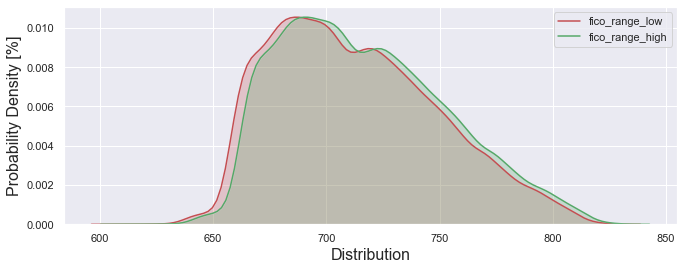

In [244]:
# Let us investigate the 02 columns
Y = loans_2007[['fico_range_low', 'fico_range_high']]

# Plot missing value map
# Y.plot(kind='kde')
# plt.show()

sns.set(rc={'figure.figsize':(11, 4)})

# #Y.plot(linewidth=0.5);
cols_plot = ['fico_range_low', 'fico_range_high']

# axes = Y[cols_plot].plot(kind='kde',marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)

# for ax in axes:
#     ax.set_ylabel('Probability Density in %')

#I could not plo the histogram on top because of missing values

p1=sns.kdeplot(Y['fico_range_low'], shade=True, color="r")
p2=sns.kdeplot(Y['fico_range_high'],shade=True, color="g")
plt.ylabel('Probability Density [%]', fontsize=16)
plt.xlabel('Distribution', fontsize=16)

plt.show()

Looking at these shapes, we see that the distribution is not symetric. I may need to apply a Box Cox transformation to transform this
non dependent variables into a normal shape. Before we continue, let s check if the data has NAN values.

In [245]:
# Creating bool series True for non NAN values and False for a null value
bool_series = pd.notnull(loans_2007)
bool_series

# Display the data with NAN
loans_2007[bool_series]

# Let us print the number of missing value in two features for example
n_missing_values = Y.isnull().sum()
print(n_missing_values )

# We do have only 03 NAN data. Let s remove them
loans_2007.dropna(subset = cols_plot, inplace = True)

fico_range_low     3
fico_range_high    3
dtype: int64


In [246]:
# Check if the NAN were removed
print(loans_2007.shape[0]) # 03 points have been effectively removed

# Now we can plot the histogram and the KDE alltogether
# Y = loans_2007[['fico_range_low', 'fico_range_high']]
# p1=sns.distplot(Y['fico_range_low'], hist = True, kde = True, color = 'r', label = 'fico_range_low', bins = 50)
# p1=sns.distplot(Y['fico_range_high'], hist = True, kde = True, color = 'g', label = 'fico_range_high', bins = 50)

# plt.ylabel('Probability Density [%]', fontsize=16)
# plt.xlabel('Distribution', fontsize=16)
# plt.legend(prop={'size': 12})
# plt.title('Fico range low and high range')
# plt.show()

Y.describe()


42535


,fico_range_low,fico_range_high
count,42535.000000,42535.000000
mean,713.052545,717.052545
std,36.188439,36.188439
min,610.000000,614.000000
25%,685.000000,689.000000
50%,710.000000,714.000000
75%,740.000000,744.000000
max,825.000000,829.000000


Check the Pearson correlation between these values:

In [247]:
Y.corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


We only need to keep one of the FICO scores to avoid colinearity between data in our model. 

In [248]:
# Create a cell "fico_average" == containing the average of fico_ran ge_low and fico_range_high

loans_2007['fico_average'] = (loans_2007['fico_range_high'] + loans_2007['fico_range_low']) / 2
cols = ['fico_range_low','fico_range_high','fico_average']
loans_2007[cols].head()

,fico_range_low,fico_range_high,fico_average
0,735.0,739.0,737.0
1,740.0,744.0,742.0
2,735.0,739.0,737.0
3,690.0,694.0,692.0
4,695.0,699.0,697.0


In [249]:
# Now we can drop the fico_ column and maintain the average
drop_cols = ['fico_range_low','fico_range_high','last_fico_range_low', 'last_fico_range_high']
loans_2007 = loans_2007.drop(drop_cols, axis=1)
loans_2007.shape

(42535, 35)

In [250]:
# Check both the datatypes and if there is missing values print(f"Data types:\n{11 * '-'}")
print(f"{loans_2007.dtypes}\n")
print(f"Sum of null values in each feature:\n{35 * '-'}")
print(f"{loans_2007.isnull().sum()}")
loans_2007.head(2)


loan_amnt                     float64
term                           object
installment                   float64
grade                          object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util                     object
total_acc                     float64
initial_list_status            object
last_credit_pull_d             object
collections_

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0


### 2.2 Investigating  Loan Grades


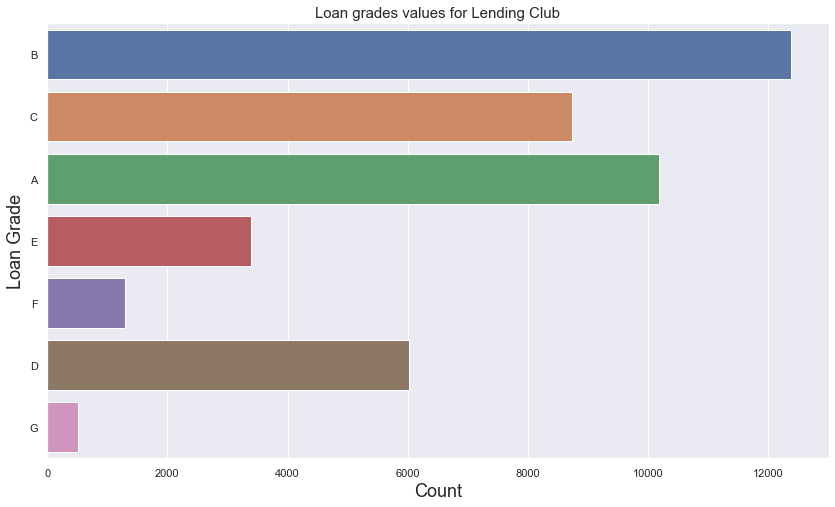

In [251]:
# Count the number 00f loan grades
loan_grade = loans_2007['grade'].value_counts

# Plot the value counts
plt.figure(figsize=(14, 8))
sns.countplot(y = loans_2007['grade'])
plt.xlabel("Count", fontsize=18)
plt.ylabel("Loan Grade", fontsize=18)
plt.title("Loan grades values for Lending Club", y=1, fontdict={"fontsize": 15});

## Observations

Grade loans "B" occur more often than "A" and "C". There are few grade "F" and "G", probably for the best! We are interested to understand very well the borrowers with the very low "loan grade". 

### 2.3 Loan Amount vs. Home Ownership

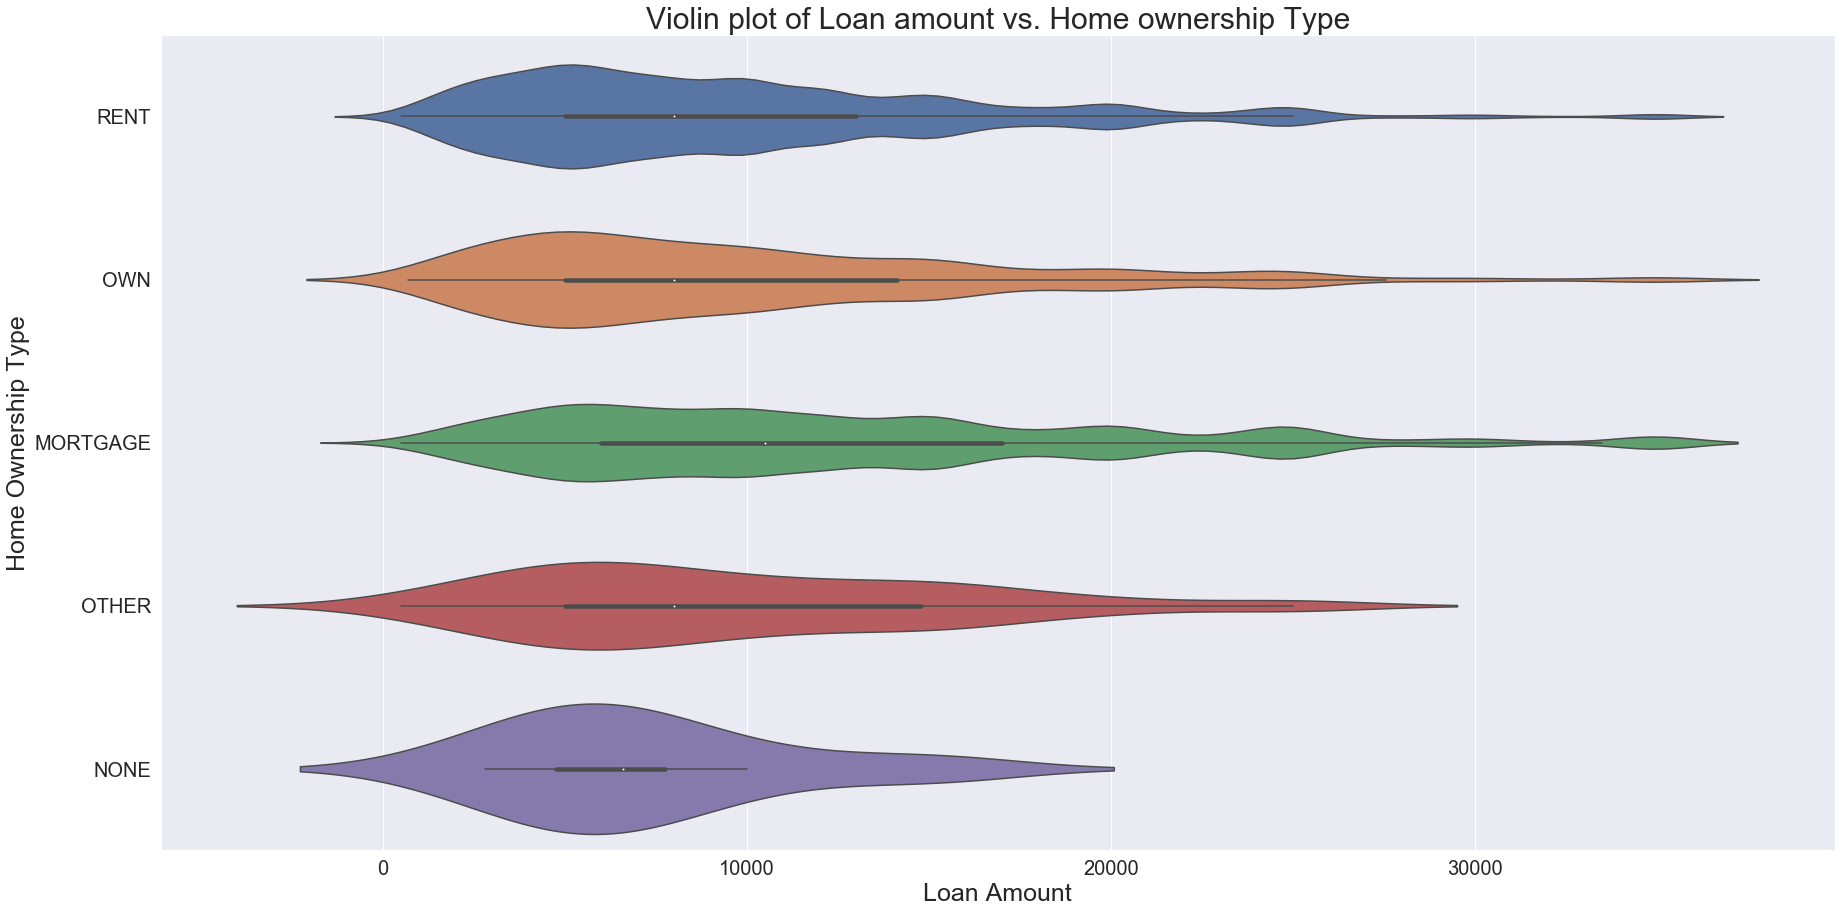

In [252]:
# Plot the borrower's installements compared to loop grade
plt.figure(figsize=(30, 15))
sns.violinplot(x = 'loan_amnt', y = 'home_ownership', data=loans_2007, split=True)
plt.title('Violin plot of Loan amount vs. Home ownership Type', fontsize = 30)
plt.xlabel('Loan Amount', fontsize=25)
plt.ylabel('Home Ownership Type', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Observations

From this plot, I am highlighting the mean and the desity distribution for loan amounts per home-ownerships. The borrowers are classified in five categories of ownership type. The one with a "morgage" appears to have the highest average loan amount and those who "own" have the lowest loan amount for analytical categories. Let's try to understand the purpose of the loan.

### 2.4 Loan Amount vs. Purpose

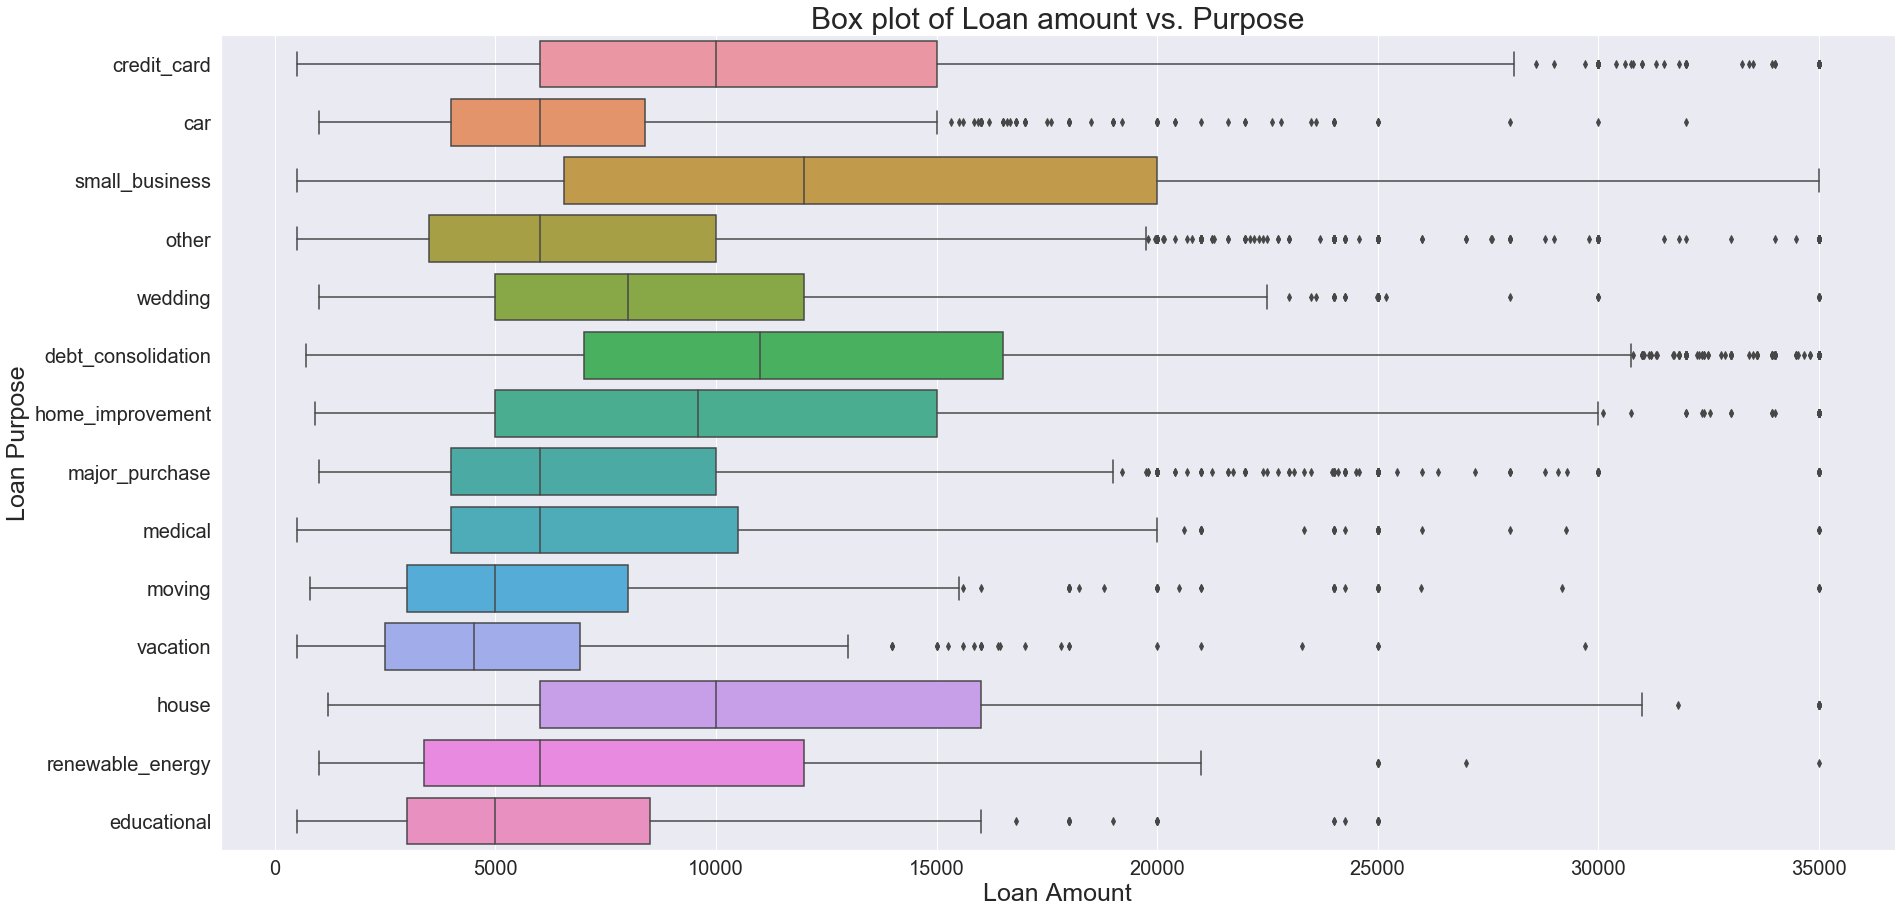

In [253]:
# Plot the borrower's installements compared to loan purpose
plt.figure(figsize=(30, 15))
sns.boxplot(x = 'loan_amnt', y = 'purpose', data=loans_2007)
plt.title('Box plot of Loan amount vs. Purpose', fontsize = 30)
plt.xlabel('Loan Amount', fontsize=25)
plt.ylabel('Loan Purpose', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Observations

There are 14 loan purposes - small business loans have the highest average loan amount compared to other categories with around 12,000 $ average. The category vacation loans have the smallest average loan amount with 4,500 average, just slighly lower than educational and car.

### 2.5 Correlation Matrix

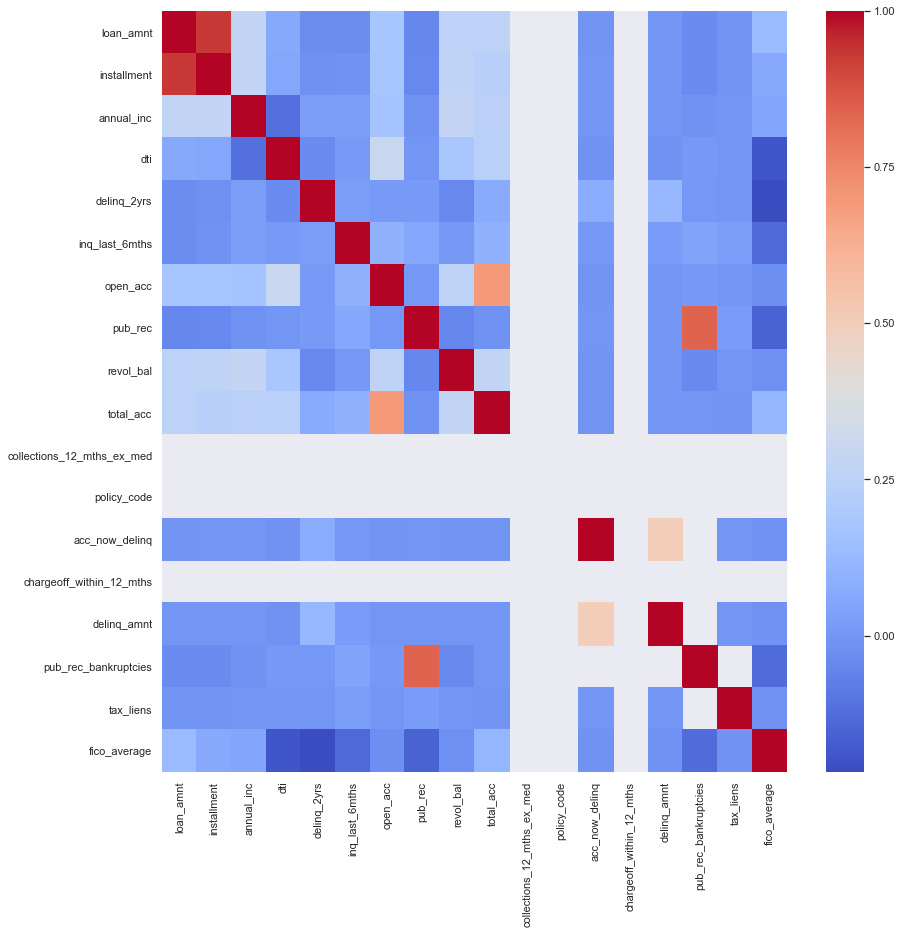

In [254]:
# Set correlation variable
corr = loans_2007.corr()
# Plot the heatmap
plt.figure(figsize=(14, 14))
sns.heatmap(corr,
           xticklabels = corr.columns,
           yticklabels = corr.columns,
           cmap = 'coolwarm')

## Observations

There is a strong correlation between "installemnt" values and "loan amnt", "open_acc" and "total_acc", "pub_rec_bankruptcies" and "pub_rec". These multicolinearity should be removed in the following model as each of this couple explains the data in trhe same manner. We will be overfitting the model if both of these features are contained in the final model. 

They are also features such as "collections_12_mnths_ex_med", "policy_code", and "chargeoff_within_12_mths" that should be removed or investigated further.

### 2.6 Loan Distributions

The  column "loan_status" is the target variable that stands for the customer's loan behaviours. I am investigating the useful features for the model.

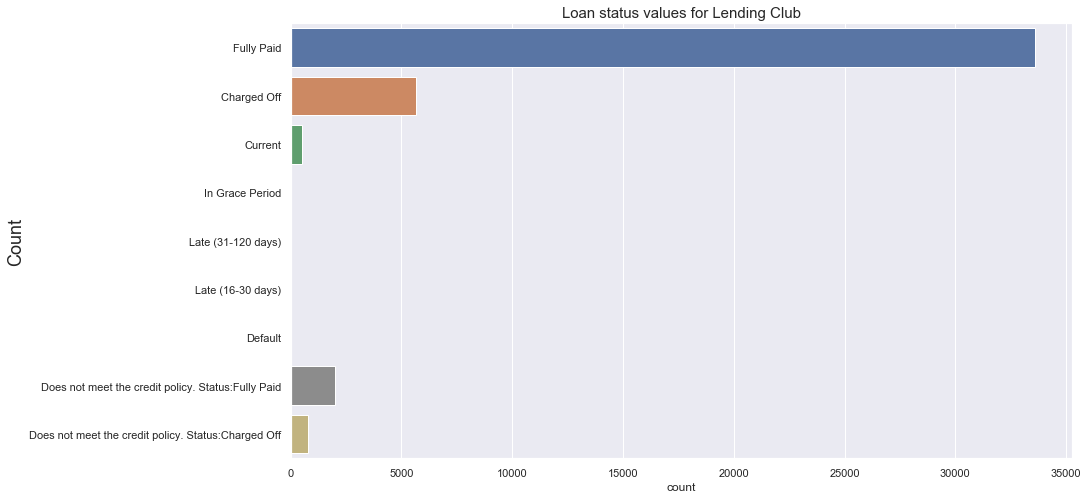

In [255]:
# Analyse deeply the contain of 'Loans_Status' and print the value counts of 'loan_status'
loans_2007['loan_status'].value_counts(normalize=True)


plt.figure(figsize=(14, 8))
sns.countplot(y = loans_2007['loan_status'])
plt.ylabel("Count", fontsize=18)
plt.title("Loan status values for Lending Club", y=1, fontdict={"fontsize": 15});

## Observations

We have 15 features with missing values. The number of Charge Off loans represent only 13 perc of the data. Which one of the 09 possible values could be used for modelling? Let's understand these 09 features...



In [256]:
meaning = [
"Loan has been fully paid off.",
"Loan for which there is no longer a reasonable expectation of further payments.",
"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace.",
"Loan is up to date on current payments.",
"The loan is past due but still in the grace period of 15 days.",
"Loan hasn't been paid in 31 to 120 days (late on the current payment).",
"Loan hasn't been paid in 16 to 30 days (late on the current payment).",
"Loan is defaulted on and no payment has been made for more than 121 days."]

status, count = loans_2007["loan_status"].value_counts().index, loans_2007["loan_status"].value_counts().values

loan_statuses_explanation = pd.DataFrame({'Loan Status': status,'Count': count,'Meaning': meaning})[['Loan Status','Count','Meaning']]
loan_statuses_explanation


,Loan Status,Count,Meaning
0,Fully Paid,33586,Loan has been fully paid off.
1,Charged Off,5653,Loan for which there is no longer a reasonable expectation of further payments.
2,Does not meet the credit policy. Status:Fully Paid,1988,"While the loan was paid off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
3,Does not meet the credit policy. Status:Charged Off,761,"While the loan was charged off, the loan application today would no longer meet the credit policy and wouldn't be approved on to the marketplace."
4,Current,513,Loan is up to date on current payments.
5,In Grace Period,16,The loan is past due but still in the grace period of 15 days.
6,Late (31-120 days),12,Loan hasn't been paid in 31 to 120 days (late on the current payment).
7,Late (16-30 days),5,Loan hasn't been paid in 16 to 30 days (late on the current payment).
8,Default,1,Loan is defaulted on and no payment has been made for more than 121 days.


### Interpretation of the table

Based on the preview table, the two first features are fundementals for our modeling problem. We will therefore keep 

    . 'Fully Paid', 
    . 'Charged Off'.
    . 'Default'

The other values describe loans that are ongoing or in progress, and even though some loans are late on Payments because we are interested in predicting the ability for the borrowers to pay back loans.

From the above, we merge 'Charged Off' and 'Default" together meaning that anyone who fell into this caegory defaulted their loan. Therefore, we can treat the problem as *binary classification*. In the following, I will transform the 'Fully Paid' values to "1" for positive case and the 'Charged Off' values to "0" for the negative case.

In [257]:
# Combinining Charged Off and Defaulted columns
count_before = loans_2007['loan_status'].value_counts()
count_before
#loans_2007['loan_status'].value_counts()

Fully Paid                                             33586
Charged Off                                             5653
Does not meet the credit policy. Status:Fully Paid      1988
Does not meet the credit policy. Status:Charged Off      761
Current                                                  513
In Grace Period                                           16
Late (31-120 days)                                        12
Late (16-30 days)                                          5
Default                                                    1
Name: loan_status, dtype: int64

In [258]:
# Combinining Charged Off and Defaulted columns
loans_2007['loan_status'] = loans_2007['loan_status'].replace({'Default' : 'Charged Off'})
#loans_2007['loan_status'].value_counts(normalize=True, dropna=False)

In [259]:
# Get number of positive and negative examples
pos = loans_2007[loans_2007['loan_status'] == 'Fully Paid'].shape[0] # Assuming this is positive
neg = loans_2007[loans_2007['loan_status'] == 'Charged Off'].shape[0] # Assuming this is negative

print(f"Positive examples = {pos}")
print(f"Negative examples = {neg}")

print(f"Proportion of Charged Off to Fully Paid = {(neg / pos) * 100:.2f}%")
loans_2007['loan_status'].value_counts(normalize=True, dropna=False)

Positive examples = 33586
Negative examples = 5654
Proportion of Charged Off to Fully Paid = 16.83%


Fully Paid                                             0.789609
Charged Off                                            0.132926
Does not meet the credit policy. Status:Fully Paid     0.046738
Does not meet the credit policy. Status:Charged Off    0.017891
Current                                                0.012061
In Grace Period                                        0.000376
Late (31-120 days)                                     0.000282
Late (16-30 days)                                      0.000118
Name: loan_status, dtype: float64

About 79% of the remaining loans have been fully paid and 13% have charged off. Hence, we have a somewhat unbalanced classificationn problem. 

In [260]:
# Collecting only "Fully Paid" and "Charged Off"
loans_2007 = loans_2007[(loans_2007["loan_status"] == "Fully Paid") | (loans_2007["loan_status"] == "Charged Off")]
print(loans_2007['loan_status'].value_counts())

# Label encoding the two categories
mapping_dictionary = {"loan_status":{ "Fully Paid": 1, "Charged Off": 0}}
loans_2007 = loans_2007.replace(mapping_dictionary)


Fully Paid     33586
Charged Off     5654
Name: loan_status, dtype: int64


In [261]:
loans_2007.head(2)

,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,url,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,f,Sep-2016,0.0,1.0,INDIVIDUAL,0.0,0.0,0.0,0.0,0.0,742.0


## 3. Remove Columns with only one value

##### Let s make a plot with the cardinality of each variable:


Text(0.5, 1.0, 'Cardinality')

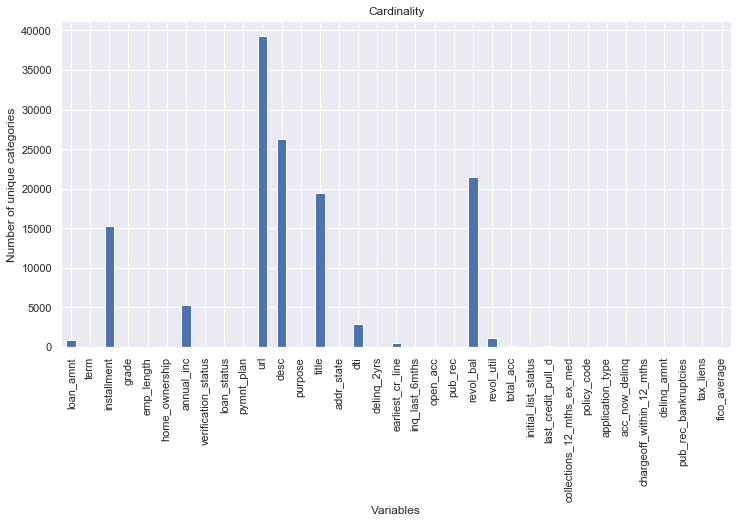

In [262]:
loans_2007.nunique().plot.bar(figsize = (12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')
#fig = loans_2007.sort_values(by="loan_amnt",ascending=False).plot.bar()
#fig.axhline(y=1, color='red')

In [263]:
# returm the number of unique values, excluding any null values
loans_2007 = loans_2007.loc[:,loans_2007.apply(pd.Series.nunique) != 1]

There may be some columns with more than one unique value, but ibe value that has insignificant frequency in the data set. Let's find and drop any columns with unique values that appear fewer than 04 times:

In [264]:
print(loans_2007.columns)

for col in loans_2007.columns:
    print('Search column:', col)
    if(len(loans_2007[col].unique()) < 4):
        print(loans_2007[col].value_counts())
        print()

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'fico_average'],
      dtype='object')
Search column: loan_amnt
Search column: term
 36 months    29096
 60 months    10144
Name: term, dtype: int64

Search column: installment
Search column: grade
Search column: emp_length
Search column: home_ownership
Search column: annual_inc
Search column: verification_status
Not Verified       16845
Verified           12526
Source Verified     9869
Name: verification_status, dtype: int64

Search column: loan_status
1    33586
0     5654
Name: loan_status, dtype: int64

Search column: pymnt_plan
n    39239
y        1
Name: pymnt_plan, dtype: int64

Sear

### Observation
The payment plan column "pymnt_plan" has two unique values, 'y' and 'n', with 'y'occuring ONCE. We should drop this column:

In [265]:
loans_2007 = loans_2007.drop('pymnt_plan', axis = 1)

### Observation
After this preprocessing steps, let's save the file into a .csv one.

In [266]:
loans_2007.to_csv("C:/Users/adjanni/Desktop/Python_DataScience_Training/Data_Cleaning_examples/Machine_Learning_Projects/filtered_loans_2007.csv", index=False)

## 3. Analysing and Setting up Features for Machine Learning

In this section, we will prepare the features by:

(1) Handling missing values 

(2) Coverting categorical columns to numeric features

In [267]:
filtered_loans = pd.read_csv("C:/Users/adjanni/Desktop/Python_DataScience_Training/Data_Cleaning_examples/Machine_Learning_Projects/filtered_loans_2007.csv")
print(filtered_loans.shape)
filtered_loans.head(2)

(39240, 26)


,loan_amnt,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,url,desc,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,pub_rec_bankruptcies,fico_average
0,5000.0,36 months,162.87,B,10+ years,RENT,24000.0,Verified,1,https://lendingclub.com/browse/loanDetail.action?loan_id=1077501,Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>,credit_card,Computer,AZ,27.65,0.0,Jan-1985,1.0,3.0,0.0,13648.0,83.7%,9.0,Sep-2016,0.0,737.0
1,2500.0,60 months,59.83,C,< 1 year,RENT,30000.0,Source Verified,0,https://lendingclub.com/browse/loanDetail.action?loan_id=1077430,Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br> Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>,car,bike,GA,1.00,0.0,Apr-1999,5.0,3.0,0.0,1687.0,9.4%,4.0,Sep-2016,0.0,742.0


In [268]:
## Let's drop two additional columns that are not useful in this section
drop_cols = ['url', 'desc']
filtered_loans = filtered_loans.drop(drop_cols, axis = 1)
print(filtered_loans.shape)

(39240, 24)


#### Observation
The filtered dataset has 39240 rows and 24 columns. That’s 24 features for now!

### Step (1) : Missing values check
Check where they are missing values in our dataset filtered_loans and fix them!

In [269]:
Total_null = filtered_loans.isnull().sum().sort_values(ascending = False)
Percentage = (filtered_loans.isnull().sum()/filtered_loans.count()).sort_values(ascending = False)
missing_data = pd.concat([Total_null, Percentage], axis = 1, keys = ['Total_null', 'Percentage'])
missing_data

,Total_null,Percentage
emp_length,1057,0.027682
pub_rec_bankruptcies,697,0.018084
revol_util,50,0.001276
title,11,0.000280
last_credit_pull_d,2,0.000051
fico_average,0,0.000000
purpose,0,0.000000
term,0,0.000000
installment,0,0.000000
grade,0,0.000000


#### Observation

Amongst the 24 features, 05 features 'emp_length', 'pub_rec_bankruptcies', 'revolt_util', and 'title' have missing values. 

(1) Let's drop entirely columns where more than 1% of the rows contain null values - this corresponds to 'emp_length' and 'pub_rec_bankruptcies'. 

(2) Also, for features with missing values less than 1%, let s remove all rows from filtered_loans containing any missing values.

In [270]:
# Drop any columns with 1% of missing values
drop_list1 = ['emp_length', 'pub_rec_bankruptcies']
filtered_loans = filtered_loans.drop(drop_list1, axis = 1)

# Drop any rows containing missing values
filtered_loans = filtered_loans.dropna()


Total_null = filtered_loans.isnull().sum().sort_values(ascending = False)
Percentage = (filtered_loans.isnull().sum()/filtered_loans.count()).sort_values(ascending = False)
missing_data = pd.concat([Total_null, Percentage], axis = 1, keys = ['Total_null', 'Percentage'])

print(filtered_loans.shape)
missing_data


(39177, 22)


,Total_null,Percentage
fico_average,0,0.0
last_credit_pull_d,0,0.0
term,0,0.0
installment,0,0.0
grade,0,0.0
home_ownership,0,0.0
annual_inc,0,0.0
verification_status,0,0.0
loan_status,0,0.0
purpose,0,0.0


#### Observation

Hurray! Missing values succesfully treated! We do end up with 39177 rows and 22 columns. That is 22 features!


### Step (2) Encoding categorical columns

In [271]:
# Check the data type
filtered_loans.info()

# Count the number of occurence of data types
filtered_loans.dtypes.value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39177 entries, 0 to 39239
Data columns (total 22 columns):
loan_amnt              39177 non-null float64
term                   39177 non-null object
installment            39177 non-null float64
grade                  39177 non-null object
home_ownership         39177 non-null object
annual_inc             39177 non-null float64
verification_status    39177 non-null object
loan_status            39177 non-null int64
purpose                39177 non-null object
title                  39177 non-null object
addr_state             39177 non-null object
dti                    39177 non-null float64
delinq_2yrs            39177 non-null float64
earliest_cr_line       39177 non-null object
inq_last_6mths         39177 non-null float64
open_acc               39177 non-null float64
pub_rec                39177 non-null float64
revol_bal              39177 non-null float64
revol_util             39177 non-null object
total_acc              39177

float64    11
object     10
int64       1
dtype: int64

From the above, amongst the 22 features, there are 10 Object columns - meaning columns that contain text which need to be converted into numeric features

In [272]:
# Print Object columns solely
object_column_fd = filtered_loans.select_dtypes(include=['object'])
print(object_column_fd.iloc[0]) 
#filtered_loans['home_ownership'].value_counts()

#term = pd.to_numeric(filtered_loans.revol_util)
#sns.heatmap(filtered_loans.corr())
col =1

term                     36 months
grade                            B
home_ownership                RENT
verification_status       Verified
purpose                credit_card
title                     Computer
addr_state                      AZ
earliest_cr_line          Jan-1985
revol_util                   83.7%
last_credit_pull_d        Sep-2016
Name: 0, dtype: object


### Observation
Amongst the Object columns, 'revol_util' is th only one containing numeric values. Let s remove the '%' sign and assign the column to be a 'float'. You can check it here: print(object_column_fd['revol_util']) 

In [273]:
filtered_loans['revol_util'] = filtered_loans['revol_util'].str.rstrip('%').astype('float')
filtered_loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39177 entries, 0 to 39239
Data columns (total 22 columns):
loan_amnt              39177 non-null float64
term                   39177 non-null object
installment            39177 non-null float64
grade                  39177 non-null object
home_ownership         39177 non-null object
annual_inc             39177 non-null float64
verification_status    39177 non-null object
loan_status            39177 non-null int64
purpose                39177 non-null object
title                  39177 non-null object
addr_state             39177 non-null object
dti                    39177 non-null float64
delinq_2yrs            39177 non-null float64
earliest_cr_line       39177 non-null object
inq_last_6mths         39177 non-null float64
open_acc               39177 non-null float64
pub_rec                39177 non-null float64
revol_bal              39177 non-null float64
revol_util             39177 non-null float64
total_acc              3917

'revol_util' is now a float! Yes! Let s move on to the other object columns.

#### Check for the unique value counts for the remaining features to understand how to assign numbers to the entries

In [274]:
col = ['term','grade', 'home_ownership', 'verification_status', 'purpose', 'title', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d']
for name in col:
    print(name, ':')
    print(object_column_fd[name].value_counts(), '\n')

term :
 36 months    29040
 60 months    10137
Name: term, dtype: int64 

grade :
B    11872
A    10062
C     7970
D     5194
E     2761
F     1009
G      309
Name: grade, dtype: int64 

home_ownership :
RENT        18677
MORTGAGE    17381
OWN          3020
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

verification_status :
Not Verified       16809
Verified           12514
Source Verified     9854
Name: verification_status, dtype: int64 

purpose :
debt_consolidation    18355
credit_card            5074
other                  3921
home_improvement       2944
major_purchase         2177
small_business         1792
car                    1534
wedding                 940
medical                 688
moving                  580
vacation                377
house                   372
educational             320
renewable_energy        103
Name: purpose, dtype: int64 

title :
Debt Consolidation                            2142
Debt Consolidation Loan                

### Observation
All the object colums contain categorical variables. The main challenge here is determining how to use this information. How to turn these attributes into numerical values for further processing??


We can see that some features, such as grade and home_ownership, have values that can be encoded. However, the texts in object columns - title, addr_state, earliest_cr_line, last_credit_pull_d can t be encoded because they either contain sentences or long lists of variable/different words. As a consequence, we will keep the columns containing categorical values and drop the other ones.


In [275]:
# Drop non-categorical values in oject columns
col = ['title', 'addr_state', 'earliest_cr_line', 'last_credit_pull_d'];

filtered_loans = filtered_loans.drop(col, axis = 1)
object_column_fd = filtered_loans.select_dtypes(include=['object'])
print(object_column_fd.iloc[0])

term                     36 months
grade                            B
home_ownership                RENT
verification_status       Verified
purpose                credit_card
Name: 0, dtype: object


### Observation

We are left with object columns 'term', 'grade', 'home_ownership', 'verification_status', 'purpose' to encode.


### Encoding categorical columns

In [276]:
col = ['term','grade', 'home_ownership', 'verification_status', 'purpose']
for name in col:
    print(name, ':')
    print(object_column_fd[name].value_counts(), '\n')

term :
 36 months    29040
 60 months    10137
Name: term, dtype: int64 

grade :
B    11872
A    10062
C     7970
D     5194
E     2761
F     1009
G      309
Name: grade, dtype: int64 

home_ownership :
RENT        18677
MORTGAGE    17381
OWN          3020
OTHER          96
NONE            3
Name: home_ownership, dtype: int64 

verification_status :
Not Verified       16809
Verified           12514
Source Verified     9854
Name: verification_status, dtype: int64 

purpose :
debt_consolidation    18355
credit_card            5074
other                  3921
home_improvement       2944
major_purchase         2177
small_business         1792
car                    1534
wedding                 940
medical                 688
moving                  580
vacation                377
house                   372
educational             320
renewable_energy        103
Name: purpose, dtype: int64 



In [277]:
# Approach 1: Find and Replace - grade column
encoding_grade = {"grade": {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7}}

# Convert to column number
filtered_loans = filtered_loans.replace(encoding_grade)
filtered_loans.head()
print(filtered_loans.info())

,loan_amnt,term,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average
0,5000.0,36 months,162.87,2,RENT,24000.0,Verified,1,credit_card,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0
1,2500.0,60 months,59.83,3,RENT,30000.0,Source Verified,0,car,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0
2,2400.0,36 months,84.33,3,RENT,12252.0,Not Verified,1,small_business,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0
3,10000.0,36 months,339.31,3,RENT,49200.0,Source Verified,1,other,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0
4,5000.0,36 months,156.46,1,RENT,36000.0,Source Verified,1,wedding,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0


### Observation:

grade: the object is now a int64!

Athough the previous method is straightforward, the incovenient is that the numeric values can be misinterpreted by the algorithms. An alternative is to use the Hot Encoding that consists at converting each categorie value into a new column and assign a 1 or 0 (True/false) value to the column. The advantage is that we are not weighting a value inproperly. However, this method adds columns in our dataset.

#### Warning: watch out the size of the length of the new dataset

In [281]:
# Hot Encoding
col = ['term','home_ownership', 'verification_status', 'purpose']
filtered_loans = pd.get_dummies(filtered_loans, columns = col)
filtered_loans.head()

,loan_amnt,installment,grade,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,fico_average,term_ 36 months,term_ 60 months,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,162.87,2,24000.0,1,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,737.0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,59.83,3,30000.0,0,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,742.0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,84.33,3,12252.0,1,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,737.0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,10000.0,339.31,3,49200.0,1,20.00,0.0,1.0,10.0,0.0,5598.0,21.0,37.0,692.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,5000.0,156.46,1,36000.0,1,11.20,0.0,3.0,9.0,0.0,7963.0,28.3,12.0,732.0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Observation
The new dataset contains extra columns from the values of each feature. I could change the name of the new column by using 'prefix = '. That's all done! Let's check our dataset

In [286]:
print(filtered_loans.info())
filtered_loans.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39177 entries, 0 to 39239
Data columns (total 38 columns):
loan_amnt                              39177 non-null float64
installment                            39177 non-null float64
grade                                  39177 non-null int64
annual_inc                             39177 non-null float64
loan_status                            39177 non-null int64
dti                                    39177 non-null float64
delinq_2yrs                            39177 non-null float64
inq_last_6mths                         39177 non-null float64
open_acc                               39177 non-null float64
pub_rec                                39177 non-null float64
revol_bal                              39177 non-null float64
revol_util                             39177 non-null float64
total_acc                              39177 non-null float64
fico_average                           39177 non-null float64
term_ 36 months            

(39177, 38)

### Observation and Conclusion

I have managed to cleanup a large data and to make it ready to be used for machine learning project. 

The final step though is to save the clean dataset.

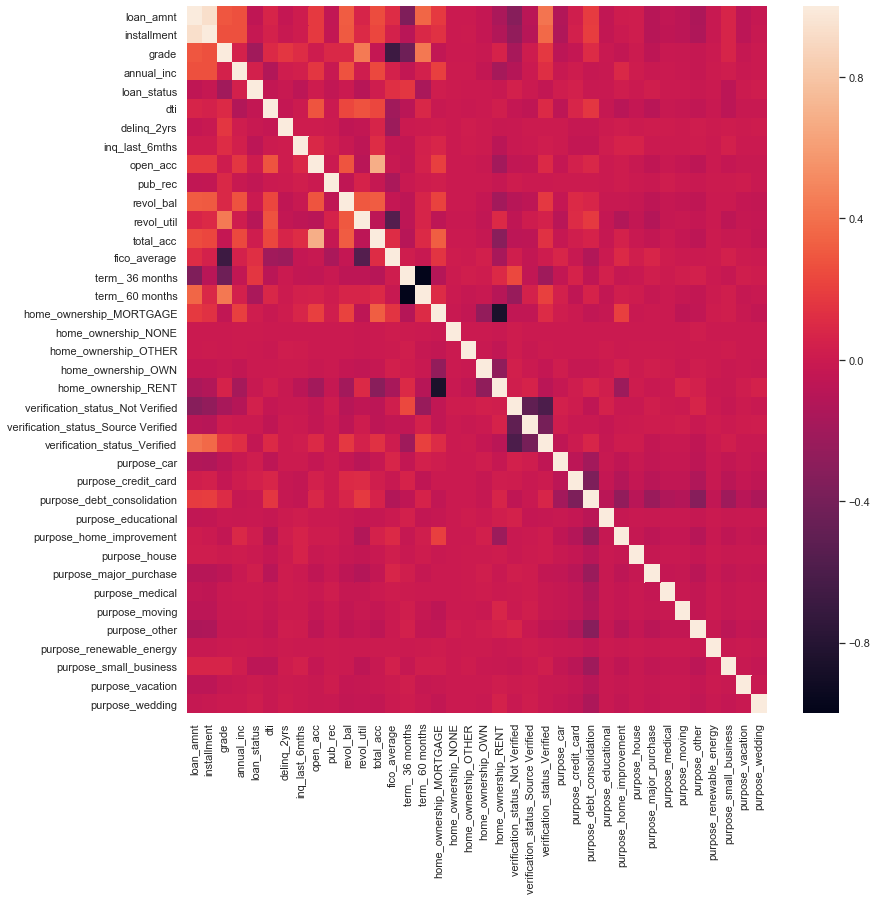

In [298]:
fig, ax = plt.subplots(figsize=(13,13)) 
sns.heatmap(filtered_loans.corr(), ax = ax)

Heatmap: Showing the correlations of features with the target. No correlations are extremely high. The correlations between 'loan_amnt' and 'installement' can be explained.

In [288]:
#Save the dataset
loans_2007.to_csv("C:/Users/adjanni/Desktop/Python_DataScience_Training/Data_Cleaning_examples/Machine_Learning_Projects/cleaned_loans_2007.csv", index=False)

We can begin the machine learning project!